## Description
**Tested using Tensorflow 2.0.0rc** <br>
This model classify human and horse using ImagDataGenerator and fit.generator. The benfit of using these are:
1. Any image size can be used and 'generator' classes will resize the image as per its requirement on runtime. So, we can test with any image size without doing any preprocessing on original dataset.

2. Labeling of images is not required. Here images are put in separate sub directories named human and horse. So, 'generator' class will automatically label the images using its directory name.

The model is trained on computer generated animated 1027 training images and 256 validation images dataset eachof size 300x300x3 pixels.

**Note: This model will not run of PC due to high processing power requirement due to runtime processing on large coloured images (300x300x3) and thus requires GPU to execute. So, use it on google colab or kaggle notebook online**

## Download the zipped training dataset from a url and store in /tmp directory

Here, we can pass any local path as well

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2019-08-28 16:16:38--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 2a00:1450:400c:c0a::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   143MB/s    in 1.0s    

2019-08-28 16:16:39 (143 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



## Download Validation dataset

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2019-08-28 16:16:41--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 2a00:1450:400c:c0a::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2019-08-28 16:16:41 (95.9 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



## Unzipping the Downloaded dataset
The zip file is extracted to the base directory `/tmp/horse-or-human`, which further contains 2 directories named `horses` and `humans`.

In short: This training set is the data we ar going to use train the neural network model by telling it that 'this is what a horse looks like', 'this is what a human looks like'.
All these images are computer generated animated images

In [4]:
import os
import zipfile

# unzip training dataset
local_zip = '/tmp/horse-or-human.zip' 
with zipfile.ZipFile(local_zip, 'r') as zipobj:  # open a zip file in read mode
  zipobj.extractall('/tmp/horse-or-human')  
#   zip.printdir()    # Display contents of zip file

# unzip validation dataset
local_zip = '/tmp/validation-horse-or-human.zip'
with zipfile.ZipFile(local_zip, 'r') as zipobj:  # open a zip file in read mode
  zipobj.extractall('/tmp/validation-horse-or-human')  

# walk through the extracted training directory
for root, directories, files in os.walk('/tmp/horse-or-human'): 
  print(root)
  print(directories)
#   print(files)
  
# walk through the extracted validation directory
for root, directories, files in os.walk('/tmp/validation-horse-or-human'): 
  print(root)
  print(directories)
#   print(files)

/tmp/horse-or-human
['horses', 'humans']
/tmp/horse-or-human/horses
[]
/tmp/horse-or-human/humans
[]
/tmp/validation-horse-or-human
['horses', 'humans']
/tmp/validation-horse-or-human/horses
[]
/tmp/validation-horse-or-human/humans
[]


## Define the Human & Horse Directories
**Notice that We do not explicitly label the images as horses or humans as we did with the handwriting example earlier, where each image is labeled between 0 to 9.** 
This is because Later we will use an inbuilt keras api called ImageGenerator. And this is coded to read images from subdirectories, and automatically label them from the name of that subdirectory. So, for example, you will have a 'training' directory containing a 'horses' directory and a 'humans' one. ImageGenerator will label the images appropriately for you, reducing a coding step. 

In [5]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')  # join dir and subdir path
print(train_horse_dir)

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our validation horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our validation human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')
print(validation_human_dir)

/tmp/horse-or-human/horses
/tmp/validation-horse-or-human/humans


**Display Human and horses names from their respective training directories**

In [6]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])   # display first 10 horses names

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])    # display first 10 human names

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse15-3.png', 'horse13-0.png', 'horse49-7.png', 'horse06-9.png', 'horse01-1.png', 'horse33-0.png', 'horse36-0.png', 'horse01-5.png', 'horse07-5.png', 'horse49-0.png']
['human02-06.png', 'human07-10.png', 'human13-02.png', 'human09-14.png', 'human16-14.png', 'human04-07.png', 'human11-16.png', 'human13-09.png', 'human02-22.png', 'human12-14.png']
['horse4-503.png', 'horse5-076.png', 'horse4-588.png', 'horse5-018.png', 'horse6-089.png', 'horse3-416.png', 'horse2-136.png', 'horse4-102.png', 'horse5-360.png', 'horse2-383.png']
['valhuman01-14.png', 'valhuman04-17.png', 'valhuman03-20.png', 'valhuman04-15.png', 'valhuman05-07.png', 'valhuman03-13.png', 'valhuman04-10.png', 'valhuman05-13.png', 'valhuman03-08.png', 'valhuman01-02.png']


**Find total sample images of Human and Horses**

In [7]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


## Display first 8 Horses and Humans images

/tmp/horse-or-human/horses/horse15-3.png
/tmp/horse-or-human/horses/horse13-0.png
/tmp/horse-or-human/horses/horse49-7.png
/tmp/horse-or-human/horses/horse06-9.png
/tmp/horse-or-human/horses/horse01-1.png
/tmp/horse-or-human/horses/horse33-0.png
/tmp/horse-or-human/horses/horse36-0.png
/tmp/horse-or-human/horses/horse01-5.png
/tmp/horse-or-human/humans/human02-06.png
/tmp/horse-or-human/humans/human07-10.png
/tmp/horse-or-human/humans/human13-02.png
/tmp/horse-or-human/humans/human09-14.png
/tmp/horse-or-human/humans/human16-14.png
/tmp/horse-or-human/humans/human04-07.png
/tmp/horse-or-human/humans/human11-16.png
/tmp/horse-or-human/humans/human13-09.png


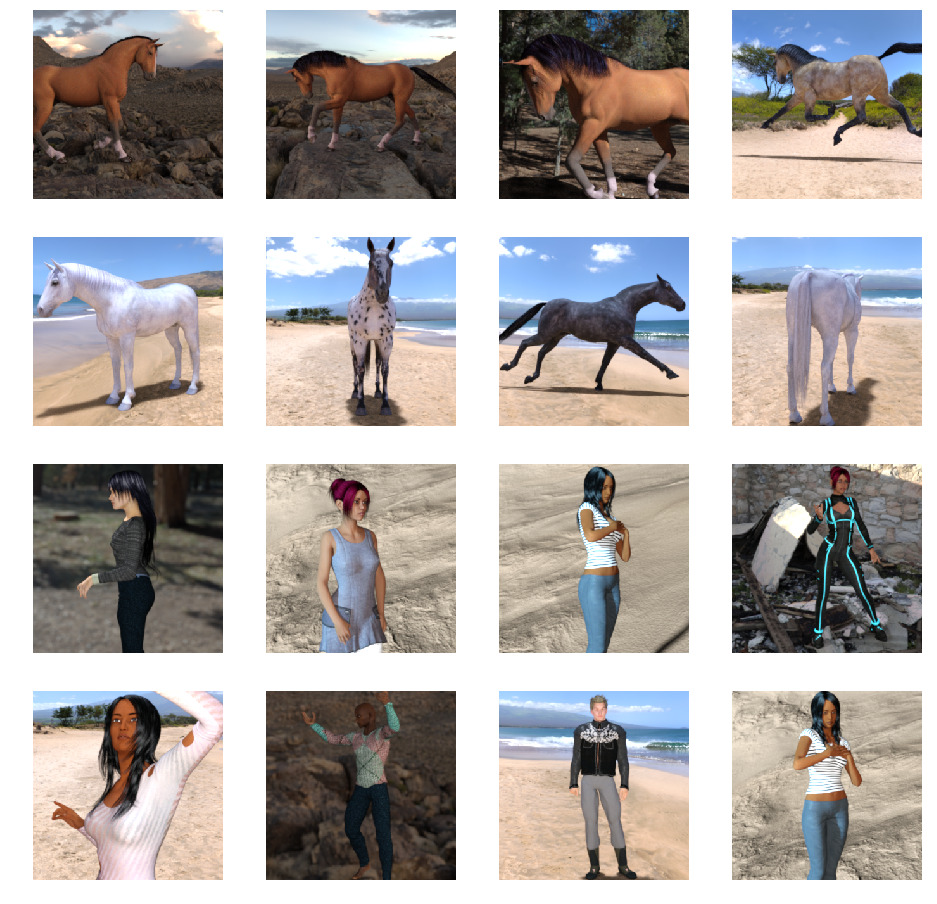

In [8]:
# Display matplotlib images inside the notebook 
%matplotlib inline    

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()   # get current figure(gcf) size
fig.set_size_inches(ncols * 4, nrows * 4)  # expand display of image size to 4 times

for i in range(8):
  horse_path = os.path.join(train_horse_dir,train_horse_names[i])
  print(horse_path)
  sp = plt.subplot(nrows, ncols, i+1)  # Display as 4 rows and 4 columns (max. 16 images)
  sp.axis('Off') # Don't show axis (or gridlines)
  horse_image = mpimg.imread(horse_path)
  plt.imshow(horse_image)

i = 0
for i in range(8):
  human_path = os.path.join(train_human_dir,train_human_names[i])
  print(human_path)
  sp = plt.subplot(nrows, ncols, i+9)  # Display as 4 rows and 4 columns (max. 16 images)
  sp.axis('Off') # Don't show axis (or gridlines)
  human_image = mpimg.imread(human_path)
  plt.imshow(human_image)

## Import Tensorflow

In [9]:
# !pip install tensorflow==2.0.0-rc0  to install tensorflow 2.0.0 in colab/kaggle
import tensorflow as tf
print(tf.__version__)

1.14.0


## Define the CNN Model
Note that because we are facing a two-class classification problem, i.e. a *binary classification problem*, we will use Sigmoid Activation as it is used for binary classification (0 or 1).

Also notice the input_shape as 300x300x3. Here 3 means we are delaing with colured images

In [10]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # 1st convolution layer
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 2nd convolution layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 3rd convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 4th convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 5th convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

W0828 16:16:48.695627 140458264172416 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Prints a summary of Network
The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the dimensions.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

## Compile the Model
Train our model with the `binary_crossentropy` loss, because it's a binary classification problem and our final activation is a sigmoid. We will use the `rmsprop` optimizer this time with a learning rate of `0.001`. We can use "adam" optimizer as well.Both of these automatically adapt the learning rate during training whereas SGD can't.

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

W0828 16:16:49.059005 140458264172416 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Data Preprocessing

Let's set up data generators that will read pictures in our source folders, convert them to `float32` tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of images of size 300x300 and their labels (binary).

To preprocess our images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).

In Keras this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with the Keras model methods that accept data generators as inputs: `fit_generator`, `evaluate_generator`, and `predict_generator`.

**Similarly** validation data generator will also be same. Only difference is that /tmp/horse-or-human directory will be changed to validation directory path. And train_generator will be changed with validation_generator

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255 to normalize the data
# ImageDataGenerator: generate batches of tensor image data with real-time data augmentation.
train_datagen = ImageDataGenerator(rescale=1./255) 
validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
# The name of sub directory will be the lables for the contained image
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        # Using target size; All images will be resized automatically to 300x300 on runtime. In our case, 
        # images are already 300x300 but we can put images of any other size as well
        target_size=(300, 300),  
        batch_size=128,      # Images are loaded in the batches of 128 images per batch
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# validation generator for validation image directory
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## Training the Model
Let's train for 15 epochs -- this may take a few minutes to run.

The Loss and Accuracy are a great indication of progress of training. It's making a guess as to the classification of the training data, and then measuring it against the known label, calculating the result.

In [14]:
history = model.fit_generator(
      train_generator,  # stream the generated normalized batch of images from training image dir
    # steps_per_epoch=8 because batch_size=128. So, 128*8=1024 ie. 8 epochs are required to pass
    # all images to model. And we have a total of 1027 images so skipping the last 3 images  
      steps_per_epoch=8, 
      epochs=10, # No. of times for which whole dataset is passed to the model for training
      validation_data=validation_generator,
      validation_steps=8,  # Total 256 validation images. So, 32(batch_size)x8=256
      verbose=1) # decides how much data/logs to be displayed on screen during training

Epoch 1/10
8/8 [==============================] - 10s 1s/step - loss: 1.3682 - acc: 0.5551 - val_loss: 0.6981 - val_acc: 0.5000
Epoch 2/10
8/8 [==============================] - 8s 972ms/step - loss: 0.7993 - acc: 0.6396 - val_loss: 0.5376 - val_acc: 0.8125
Epoch 3/10
8/8 [==============================] - 7s 909ms/step - loss: 0.7191 - acc: 0.7219 - val_loss: 5.8797 - val_acc: 0.5000
Epoch 4/10
8/8 [==============================] - 7s 909ms/step - loss: 0.7618 - acc: 0.7864 - val_loss: 0.6192 - val_acc: 0.7500
Epoch 5/10
8/8 [==============================] - 8s 1s/step - loss: 0.3987 - acc: 0.8691 - val_loss: 0.6880 - val_acc: 0.8203
Epoch 6/10
8/8 [==============================] - 6s 792ms/step - loss: 0.5423 - acc: 0.8191 - val_loss: 0.9386 - val_acc: 0.6836
Epoch 7/10
8/8 [==============================] - 8s 1s/step - loss: 0.2038 - acc: 0.9297 - val_loss: 0.4322 - val_acc: 0.8750
Epoch 8/10
8/8 [==============================] - 7s 936ms/step - loss: 0.0907 - acc: 0.9666 - val

## Predicting the image using trained Model

You will notice that it is correctly predicting human and horse but failed for few. Because it is trained on computer generated images with very limited dataset. As you can see in the images dataset, a single image is repeated multiple times with different rotationsa


(300, 300, 3)
(1, 300, 300, 3)


Using TensorFlow backend.


[[0.]]
 image is a horse


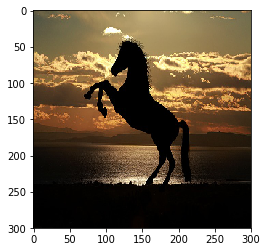

In [15]:
import numpy as np
from keras.preprocessing import image
import os
import matplotlib.pyplot as plt

# provide the full image path
# path = '/content/beautiful-1274056_1920.jpg'
# path = '/content/worried-girl-413690_640.jpg'
path = '/content/horse-1804425_640.jpg'

img = image.load_img(path, target_size=(300, 300))

plt.imshow(img)
  
image = image.img_to_array(img)  # convert image to an array
print(image.shape)

image = np.expand_dims(image, axis=0)  # increase the no. of dimension by 1
print(image.shape)

classes = model.predict(image, batch_size=10)
print(classes)
if classes[0]>0.5:
  print(" image is a human")
else:
  print(" image is a horse")
 

### Visualizing Intermediate Representations

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


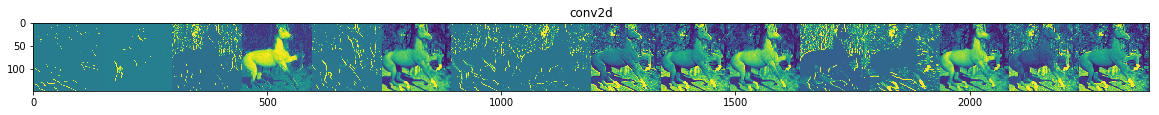

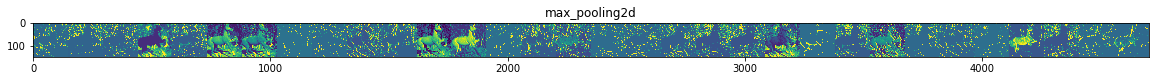

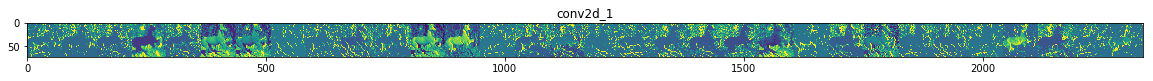

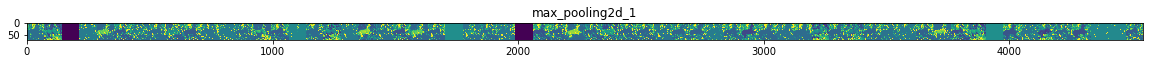

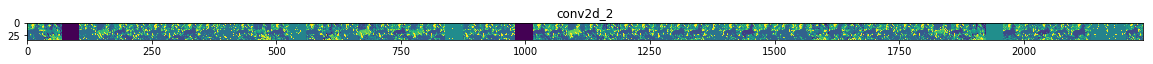

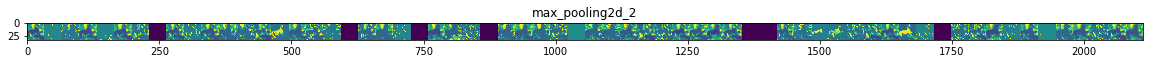

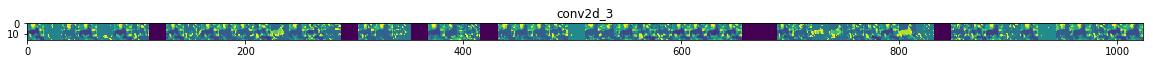

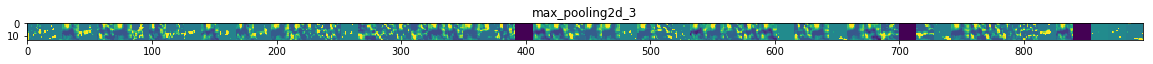

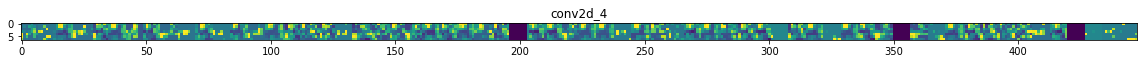

In [16]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

As you can see we go from the raw pixels of the images to increasingly abstract and compact representations. The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called "sparsity." Representation sparsity is a key feature of deep learning.


These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline.

## Clean Up only for Colab

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)